# I. Tutorial de pandas

El siguiente tutorial fue elaborado por Alejandro Vargas Chaves (200932185) por motivo de investigación personal en el curso de reconocimiento de patrones.

## 1. Introducción 

Pandas es una biblioteca open source, la cual provee alto desempeño, estructuras de datos fáciles de usar y utilidades de analisis de datos para el lenguaje de programación python. Puede utilizar el siguiente enlace para mayor referencia https://pandas.pydata.org/

### 1.1 Instalación

Solamente se requiere utilizar el siguiente comando en terminal 

conda install pandas

### 1.2 Uso

Para utilizar la biblioteca se requiere hacer un import en el lenguaje python como se observa a continuación:



In [48]:
import pandas as pd

## 2. Cargando archivos en Pandas

Pandas como se comentó anteriormente, Pandas permite cargar datos de diversas fuentes de archivos o bases de datos. Para importar un set de datos de un csv se utiliza el siguiente comando read_csv(). Se debe poner la ruta dentro de los parentesis.

In [58]:
equipos = pd.read_csv('equipos_futbol.csv')


## 3. Utilizando datos en pandas

Padas permite utilizar datos almacenados en archivos como .csv o bases de datos. Para analizar datos en pandas se deben utilizar estructuras de datos compatibles con pandas. 

### 3.1 Estructuras de datos de pandas

Las principales estructuras de datos son: Series y DataFrames

#### 3.1.1 Series

La serie corresponde a una estructura de una sola dimension 

In [49]:
data = ['Alejandro','Pablo','Daniel','Fernando','Juan Carlos']
 
ser = pd.Series(data)
print(ser)

0      Alejandro
1          Pablo
2         Daniel
3       Fernando
4    Juan Carlos
dtype: object


Los elementos dentro de una serie se pueden acceder por medio de indices [posicion] y tambien se puede utilizar slicing de python[posicion:posicion] para obtener un subset de datos

In [50]:
ser = pd.Series(data)
print(ser[0])
print("Obtener un subset de datos")
print(ser[:3])

Alejandro
Obtener un subset de datos
0    Alejandro
1        Pablo
2       Daniel
dtype: object


#### 3.1.2 DataFrames

El dataframe consiste en una estructura de multiples dimensiones. Es decir representa una tabla de filas y columnas. Cada columnda tiene nombres y las filas indices.

In [51]:
 
lista = {'Equipo':['Sapprissa', 'Alajuela', 'Heredia', 'Cartago'],
        'Puntos':[27, 26, 23, 23], 'Goles a favor':[33,26,20,14], 'Goles en contra':[10,12,14,8]}
 
df = pd.DataFrame(lista)
print(df)

      Equipo  Puntos  Goles a favor  Goles en contra
0  Sapprissa      27             33               10
1   Alajuela      26             26               12
2    Heredia      23             20               14
3    Cartago      23             14                8


Se pueden manejar los datos de forma que solo se obtenga la información de algunas columnas

In [52]:
df = pd.DataFrame(lista)
print(df[['Equipo', 'Puntos']])

      Equipo  Puntos
0  Sapprissa      27
1   Alajuela      26
2    Heredia      23
3    Cartago      23


#### 3.1.2.1 Selección por filas

Los dataframes contienen meotodos para el acceso por filas por medio de los métodos de loc, iloc y ix

In [53]:
data = pd.read_csv('Demographic_Statistics_By_Zip_Code.csv')
traffic = pd.read_csv('Traffic_Violations.csv')
uk_500 = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')
#dataset tomado de https://catalog.data.gov/dataset?res_format=CSV


In [54]:
print(data.iloc[0])# primera fila

JURISDICTION NAME                      10001.00
COUNT PARTICIPANTS                        44.00
COUNT FEMALE                              22.00
PERCENT FEMALE                             0.50
COUNT MALE                                22.00
PERCENT MALE                               0.50
COUNT GENDER UNKNOWN                       0.00
PERCENT GENDER UNKNOWN                     0.00
COUNT GENDER TOTAL                        44.00
PERCENT GENDER TOTAL                     100.00
COUNT PACIFIC ISLANDER                     0.00
PERCENT PACIFIC ISLANDER                   0.00
COUNT HISPANIC LATINO                     16.00
PERCENT HISPANIC LATINO                    0.36
COUNT AMERICAN INDIAN                      0.00
PERCENT AMERICAN INDIAN                    0.00
COUNT ASIAN NON HISPANIC                   3.00
PERCENT ASIAN NON HISPANIC                 0.07
COUNT WHITE NON HISPANIC                   1.00
PERCENT WHITE NON HISPANIC                 0.02
COUNT BLACK NON HISPANIC                

In [55]:
print(data.iloc[0:5]) # primeras 5 filas

   JURISDICTION NAME  COUNT PARTICIPANTS  COUNT FEMALE  PERCENT FEMALE  \
0              10001                  44            22            0.50   
1              10002                  35            19            0.54   
2              10003                   1             1            1.00   
3              10004                   0             0            0.00   
4              10005                   2             2            1.00   

   COUNT MALE  PERCENT MALE  COUNT GENDER UNKNOWN  PERCENT GENDER UNKNOWN  \
0          22          0.50                     0                       0   
1          16          0.46                     0                       0   
2           0          0.00                     0                       0   
3           0          0.00                     0                       0   
4           0          0.00                     0                       0   

   COUNT GENDER TOTAL  PERCENT GENDER TOTAL  ...  COUNT CITIZEN STATUS TOTAL  \
0           

In [56]:
print(data.iloc[0:5, 0:2]) # primeras 2 filas con un subset de columnas

   JURISDICTION NAME  COUNT PARTICIPANTS
0              10001                  44
1              10002                  35
2              10003                   1
3              10004                   0
4              10005                   2


La opcion de loc nos permite obtener datos de filas utilizando igualdades con llaves predefinidas. Por ejemplo para obtener la cantidad de multas registradas en Rockville por exceder el limite de 35MPH se puede seguir el siguiente ejemplo:

In [57]:
traffic.set_index("SubAgency", inplace=True) #ubicamos el indice a una columna especifica
traffic.head()
print(len(traffic.loc[["1st District, Rockville","EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH"],["Date Of Stop"
]])) 

64


## 4. Operaciones en Pandas sobre dataFrames

Sobre los dataFrames se pueden realizar las operaciones add(), sub(), mul(), div()

In [59]:
#print(equipos.iloc[:,:3]) prueba para observar las columnas 
equipos["Rendimiento"]=equipos[["PG"]].div(equipos.PJ, axis=0) #se agrega una columna para verificar el rendimiento del equipo
print(equipos)

                           Equipos  PJ  PG  PE  PP  GF   GC  Dif  Pts  \
0                        Herediano  44  29  12   3  75   26   49   99   
1               Deportivo Saprissa  44  26   9   9  93   48   45   87   
2               Santos de Guápiles  44  21  16   7  76   44   32   79   
3                 L.D. Alajuelense  44  21  11  12  84   56   28   74   
4                    Pérez Zeledón  44  17  13  14  71   65    5   64   
5                       Limón F.C.  44  14  16  14  66   67   -1   58   
6                 Municipal Grecia  44  14  13  17  58   71  -13   55   
7   Universidad de Costa Rica F.C.  44  10  15  19  43   60  -17   45   
8                   Guadalupe F.C.  44  10  15  19  50   68  -18   45   
9                   A.D. Carmelita  44  11  10  23  55   77  -22   43   
10                 C.S. Cartaginés  44   5  20  19  43   70  -27   35   
11               Municipal Liberia  44   7   8  29  41  101  -60   29   

    Rendimiento  
0      0.659091  
1      0.59090

In [60]:
equipos["Puntos_solo_victorias"]=equipos[["PG"]].mul(3, axis=0) #se agrega una columna para verificar el rendimiento del equipo
print(equipos)

                           Equipos  PJ  PG  PE  PP  GF   GC  Dif  Pts  \
0                        Herediano  44  29  12   3  75   26   49   99   
1               Deportivo Saprissa  44  26   9   9  93   48   45   87   
2               Santos de Guápiles  44  21  16   7  76   44   32   79   
3                 L.D. Alajuelense  44  21  11  12  84   56   28   74   
4                    Pérez Zeledón  44  17  13  14  71   65    5   64   
5                       Limón F.C.  44  14  16  14  66   67   -1   58   
6                 Municipal Grecia  44  14  13  17  58   71  -13   55   
7   Universidad de Costa Rica F.C.  44  10  15  19  43   60  -17   45   
8                   Guadalupe F.C.  44  10  15  19  50   68  -18   45   
9                   A.D. Carmelita  44  11  10  23  55   77  -22   43   
10                 C.S. Cartaginés  44   5  20  19  43   70  -27   35   
11               Municipal Liberia  44   7   8  29  41  101  -60   29   

    Rendimiento  Puntos_solo_victorias  
0      0.

In [61]:
equipos["PJ2"]=equipos[["PG"]].add(equipos.PE, axis=0) #se agrega una columna para verificar el rendimiento del equipo
print(equipos)                            

                           Equipos  PJ  PG  PE  PP  GF   GC  Dif  Pts  \
0                        Herediano  44  29  12   3  75   26   49   99   
1               Deportivo Saprissa  44  26   9   9  93   48   45   87   
2               Santos de Guápiles  44  21  16   7  76   44   32   79   
3                 L.D. Alajuelense  44  21  11  12  84   56   28   74   
4                    Pérez Zeledón  44  17  13  14  71   65    5   64   
5                       Limón F.C.  44  14  16  14  66   67   -1   58   
6                 Municipal Grecia  44  14  13  17  58   71  -13   55   
7   Universidad de Costa Rica F.C.  44  10  15  19  43   60  -17   45   
8                   Guadalupe F.C.  44  10  15  19  50   68  -18   45   
9                   A.D. Carmelita  44  11  10  23  55   77  -22   43   
10                 C.S. Cartaginés  44   5  20  19  43   70  -27   35   
11               Municipal Liberia  44   7   8  29  41  101  -60   29   

    Rendimiento  Puntos_solo_victorias  PJ2  
0   

Se puede utilizar tambien la siguiente sintaxis

In [65]:
ganados=pd.DataFrame()
ganados["Equipos"]=equipos["Equipos"]
ganados["Jugados"]=equipos["PG"]+equipos["PE"]+equipos["PP"]    
print(ganados)

                           Equipos  Jugados
0                        Herediano       44
1               Deportivo Saprissa       44
2               Santos de Guápiles       44
3                 L.D. Alajuelense       44
4                    Pérez Zeledón       44
5                       Limón F.C.       44
6                 Municipal Grecia       44
7   Universidad de Costa Rica F.C.       44
8                   Guadalupe F.C.       44
9                   A.D. Carmelita       44
10                 C.S. Cartaginés       44
11               Municipal Liberia       44


In [67]:
equipos["Diff"]=equipos[["GF"]].sub(equipos.GC, axis=0) #se agrega una columna para verificar el rendimiento del equipo
print(equipos)

                           Equipos  PJ  PG  PE  PP  GF   GC  Dif  Pts  \
0                        Herediano  44  29  12   3  75   26   49   99   
1               Deportivo Saprissa  44  26   9   9  93   48   45   87   
2               Santos de Guápiles  44  21  16   7  76   44   32   79   
3                 L.D. Alajuelense  44  21  11  12  84   56   28   74   
4                    Pérez Zeledón  44  17  13  14  71   65    5   64   
5                       Limón F.C.  44  14  16  14  66   67   -1   58   
6                 Municipal Grecia  44  14  13  17  58   71  -13   55   
7   Universidad de Costa Rica F.C.  44  10  15  19  43   60  -17   45   
8                   Guadalupe F.C.  44  10  15  19  50   68  -18   45   
9                   A.D. Carmelita  44  11  10  23  55   77  -22   43   
10                 C.S. Cartaginés  44   5  20  19  43   70  -27   35   
11               Municipal Liberia  44   7   8  29  41  101  -60   29   

    Rendimiento  Puntos_solo_victorias  PJ2  Diff 

## 5. Visualizando datos

Pandas se puede combinar con algunas otras librerias para poder visualizar los datos 

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import array

  first_name   last_name             company_name            address  \
0    Aleshia  Tomkiewicz  Alan D Rosenburg Cpa Pc       14 Taylor St   
1       Evan   Zigomalas       Cap Gemini America        5 Binney St   
2     France     Andrade      Elliott, John W Esq       8 Moor Place   
3    Ulysses   Mcwalters           Mcmahan, Ben L      505 Exeter Rd   
4     Tyisha      Veness           Champagne Room  5396 Forth Street   

                             city           county    postal        phone1  \
0               St. Stephens Ward             Kent   CT2 7PP  01835-703597   
1                      Abbey Ward  Buckinghamshire  HP11 2AX  01937-864715   
2  East Southbourne and Tuckton W      Bournemouth   BH6 3BE  01347-368222   
3              Hawerby cum Beesby     Lincolnshire  DN36 5RP  01912-771311   
4      Greets Green and Lyng Ward    West Midlands   B70 9DT  01547-429341   

         phone2                       email  \
0  01944-369967     atomkiewicz@hotmail.com   
1  0

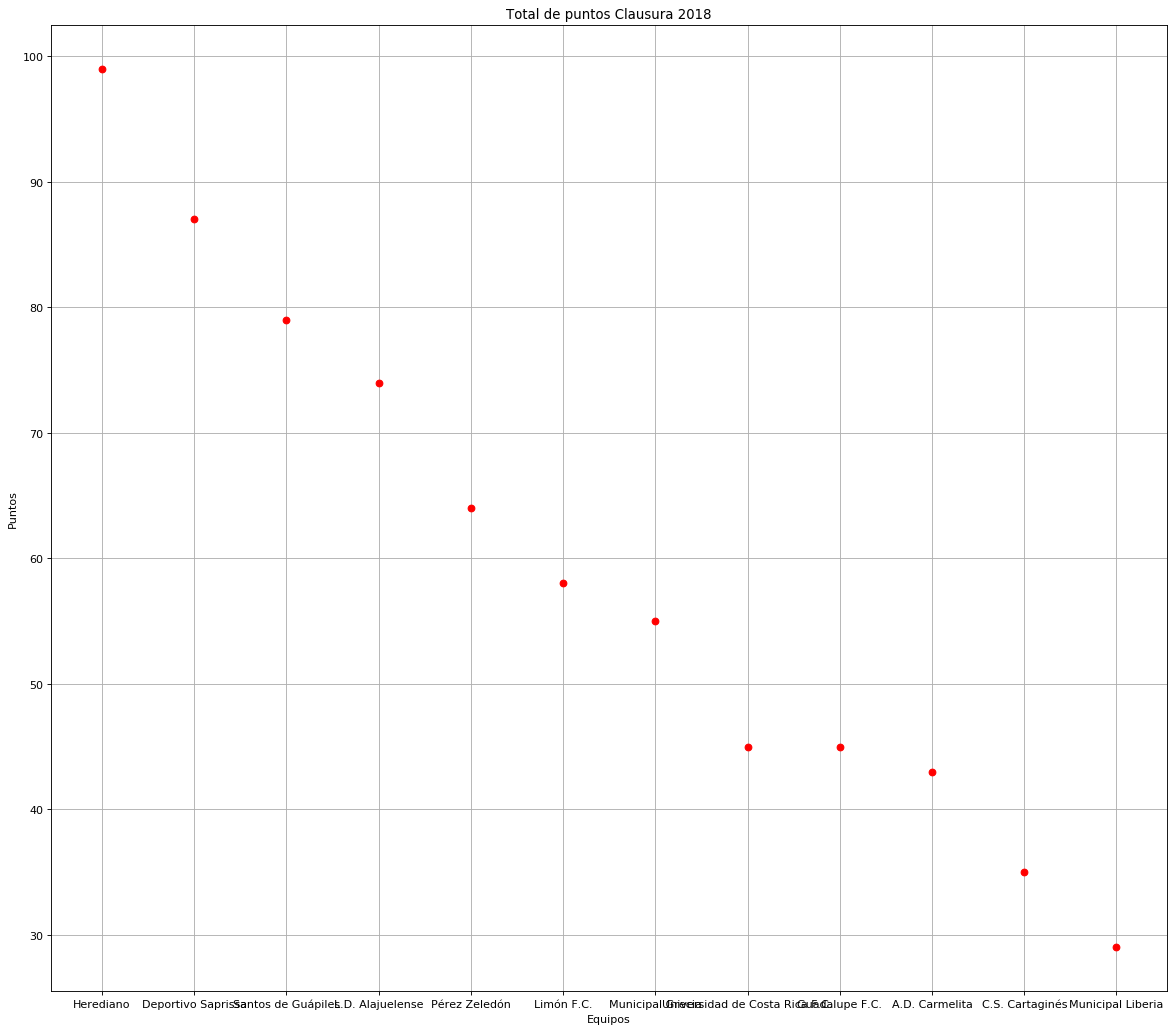

In [74]:
teams = equipos["Equipos"]

puntos = equipos["Pts"]

fig, ax = plt.subplots(figsize=(18, 16), dpi= 80)
ax.plot(teams, puntos, 'ro')

ax.set(xlabel='Equipos', ylabel='Puntos',
       title='Total de puntos Clausura 2018')
ax.grid()
plt.show()



# II Parte, análisis exploratorio de datos

Utilizando los datos demograficos de US podemos realizar un estudio de los datos utilizando pandas